### **LSTM model on Cardanocoin Coin price data**

Epoch 1/100
957/957 - 4s - loss: 6.3279e-04 - 4s/epoch - 4ms/step
Epoch 2/100
957/957 - 2s - loss: 2.4124e-04 - 2s/epoch - 2ms/step
Epoch 3/100
957/957 - 2s - loss: 2.1054e-04 - 2s/epoch - 2ms/step
Epoch 4/100
957/957 - 2s - loss: 2.1706e-04 - 2s/epoch - 2ms/step
Epoch 5/100
957/957 - 1s - loss: 1.9882e-04 - 1s/epoch - 2ms/step
Epoch 6/100
957/957 - 2s - loss: 1.9019e-04 - 2s/epoch - 2ms/step
Epoch 7/100
957/957 - 2s - loss: 1.7197e-04 - 2s/epoch - 2ms/step
Epoch 8/100
957/957 - 2s - loss: 1.7095e-04 - 2s/epoch - 2ms/step
Epoch 9/100
957/957 - 2s - loss: 1.4089e-04 - 2s/epoch - 2ms/step
Epoch 10/100
957/957 - 1s - loss: 1.4386e-04 - 1s/epoch - 2ms/step
Epoch 11/100
957/957 - 2s - loss: 1.2788e-04 - 2s/epoch - 2ms/step
Epoch 12/100
957/957 - 1s - loss: 1.2568e-04 - 1s/epoch - 2ms/step
Epoch 13/100
957/957 - 1s - loss: 1.3086e-04 - 1s/epoch - 2ms/step
Epoch 14/100
957/957 - 2s - loss: 1.3238e-04 - 2s/epoch - 2ms/step
Epoch 15/100
957/957 - 1s - loss: 1.2122e-04 - 1s/epoch - 2ms/step
Epoc

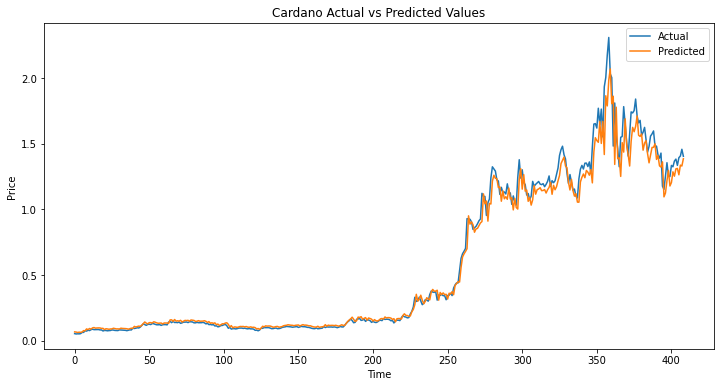

In [2]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('coin_Cardano.csv')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
dataset = df['Close'].values.reshape(-1, 1)

# preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# split data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

# function to create LSTM dataset
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# create training and testing data for LSTM model
look_back = 3
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# create and train LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# make predictions on test data
y_pred = model.predict(X_test)

# inverse transform the scaled data
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)


# evaluate model using various performance metrics
print('Evaluation Metrics for {}:'.format(df['Name'][0]))
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)
corr = np.corrcoef(y_pred.T, y_test.T)[0, 1]

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('R-squared:', r2)
print('Correlation Coefficient:', corr)

# get the name of the currency from the DataFrame
currency_name = df['Name'][0]

# plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('{} Actual vs Predicted Values'.format(currency_name))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/100
957/957 - 4s - loss: 0.0014 - 4s/epoch - 4ms/step
Epoch 2/100
957/957 - 2s - loss: 6.7526e-04 - 2s/epoch - 2ms/step
Epoch 3/100
957/957 - 2s - loss: 7.9494e-04 - 2s/epoch - 2ms/step
Epoch 4/100
957/957 - 2s - loss: 8.8649e-04 - 2s/epoch - 2ms/step
Epoch 5/100
957/957 - 2s - loss: 9.4158e-04 - 2s/epoch - 2ms/step
Epoch 6/100
957/957 - 2s - loss: 7.9060e-04 - 2s/epoch - 2ms/step
Epoch 7/100
957/957 - 2s - loss: 4.4138e-04 - 2s/epoch - 2ms/step
Epoch 8/100
957/957 - 3s - loss: 5.4246e-04 - 3s/epoch - 3ms/step
Epoch 9/100
957/957 - 2s - loss: 7.7044e-04 - 2s/epoch - 3ms/step
Epoch 10/100
957/957 - 2s - loss: 8.8763e-04 - 2s/epoch - 3ms/step
Epoch 11/100
957/957 - 3s - loss: 6.2027e-04 - 3s/epoch - 3ms/step
Epoch 12/100
957/957 - 3s - loss: 6.5450e-04 - 3s/epoch - 3ms/step
Epoch 13/100
957/957 - 3s - loss: 6.4879e-04 - 3s/epoch - 4ms/step
Epoch 14/100
957/957 - 3s - loss: 6.4193e-04 - 3s/epoch - 3ms/step
Epoch 15/100
957/957 - 2s - loss: 5.0385e-04 - 2s/epoch - 3ms/step
Epoch 16

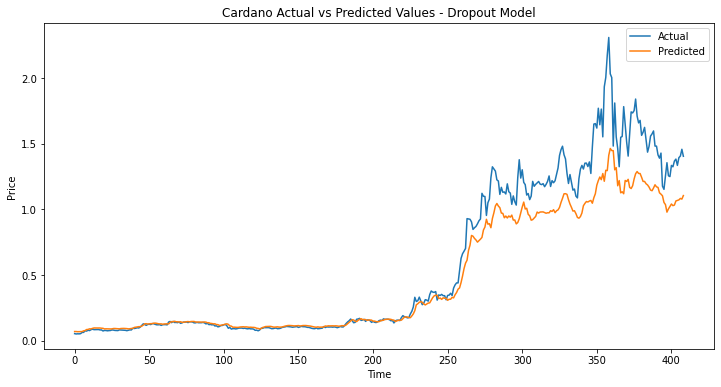

In [4]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('coin_Cardano.csv')
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
dataset = df['Close'].values.reshape(-1, 1)

# preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# split data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

# function to create LSTM dataset
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# create training and testing data for LSTM model
look_back = 3
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# create and train LSTM model with dropout
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1), dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# make predictions on test data
y_pred = model.predict(X_test)

# inverse transform the scaled data
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred)

# evaluate model using various performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
corr = np.corrcoef(y_pred.T, y_test.T)[0, 1]
r2 = r2_score(y_test, y_pred)

# evaluate dropout model using various performance metrics
print('Evaluation Metrics for {} - Dropout Model:'.format(df['Name'][0]))
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Correlation Coefficient:', corr)
print('R-squared:', r2)

# get the name of the currency from the DataFrame
currency_name = df['Name'][0]

# plot actual vs predicted values
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('{} Actual vs Predicted Values - Dropout Model'.format(currency_name))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()